# Modelleringsprosjekt - Temperatur på Jorda
#### *Av Mulan og Anna*

## Hensikt
Vi skal lage en forenklede representasjon av energibalansen på jordkloden.

## Teori
Energibalansen på jorda er et viktig system innenfor klimaforskning. Systemet er veldig komplekst, og det tregns flere avanserte modeller for å skape en best tilpasset etterligning, som kan brukes for å forstå klimaet, og forutse mulige utviklinger. I dette prosjektet skal vi lage en forenklet modell som inneholder grunnprinsippene bak klimamodellen og beregner temperaturen på jordkloden.


### Konstanter

In [34]:
#Stefan-Boltzman Konstant
sigma=(5.67e-8)                 #[W/(m^2 K^4)]
#Sola
temperatur_sol = 5778           #[Kelvin]
diameter_sol = 1391016e3        #[m]
distanse_sol_jord = 149600000e3 #[m]
#Jord
radius_jord = 6371e3            #[m]
albedo = 0.3

## Gjennomsnittlig varmestråling som treffer vertikalt påjordklodens atmosfære

Det som hovedsakelig varmer opp planeten vår, er sollys. Solen sender ut energi i form av elektromagnetisk stråling som treffer jordkloden. Gjennomsnittlig energi sola treffer jordas atmosfære med har en svært liten variasjon på 0.2 prosent per 400 år, det er dermed kalt for solkonstanten, og er målt til 1361 W/m^2. Vi kan beregne energien som treffer en planet ved å bruke varmestrålingen til solen og distansen mellom solen og planeten. Slik vil det se ut matematisk:

$$ s_0 = \frac{{radius_{sol}}^{2}}{{distanse_{sol-jord}}^2} \cdot stråling_{sol} $$

hvor S er den gjennomsnittlige strålingen som treffer planeten i W/m^2.

Ved hjelp av Stefan-Boltzmanns lov, som sier at alle gjenstander som har en temperatur over absolutt nullpunkt vil utgi varmestråling som kan skrives: 

$$ S = \sigma T^4 $$

der hvor σ er Stefan-Boltzmanns konstant og definert som 5,6703∗10−8W/(m^2K^4), og temperaturen T er målt i Kelvin. S vil da være lik strålingen fra et legeme gitt i W/m^2, og man må tenke på arealet til legemet for å få den fullstendige strålingen.

Kan vi definere strålingen fra sola som:

$$ stråling_{sol} = \sigma {T_{sol}}^4 $$

Der T_sol er solas temperatur

In [23]:
sigma = 5.6703e-8               #[W/(m^2 K^4)]
temperatur_sol = 5778           #[Kelvin]
diameter_sol = 1391016e3        #[m]
distanse_sol_jord = 149600000e3 #[m]

Stråling_sol = sigma*(temperatur_sol**4)
s0 = ((diameter_sol/2)**2)/(distanse_sol_jord**2)*Stråling_sol
print (s0)

1366.0206335810756


Her kan vi se at den gjennomsnittlig elektromagnetiske strålingen vi fikk er litt over solkonstanten, men fortsatt ikke alt for langt unna, derfor kan den brukes videre i utregningen.

## Gjennomsnittelig temperatur
Energiprinsippet er en lov som sier at energi er konstant. Det vil si at energi ikke kan skapes eller tilintetgjøres. Hvis vi ser på planeter som lukkede systemer som blir tilført varmestråling fra verdensrommet (hovedsakelig fra solen),og som sender ut varmestråling til verdensrommet, vil vi få tre muligheter:
- Mer stråling tilført enn sendt ut. Det vil si at planeten varmes opp over tid.
- Mer stråling sendt ut enn tilført. Det vil si at planeten blir kaldere over tid. 
- Strålingen tilført er lik strålingen sendt ut. Det vil si at temperaturen på planeten er konstant.

Siden vi skal finne gjennomsnittstemperaturen, anntar vi at temperaturen på jorda er konstant. det vil si at 

$$ E_{absorbert} = E_{emittert} $$

### Energi inn i systemet
For å få den fullstendige strålingen, må vi også trekke inn overflaten til legemet. Jorda er en kule, derfor vil strålingen treffe ulikt på hver del av jordkloden, for eksempel vil det være varmere rundt ekvator, og kaldere ved polene, men vi skal bare finne en modell for den gjennomsnittelige varmeinnstrålingen. Derfor kan se på jorda som en flat sirkel, som får den samme innstrålingen over alt.

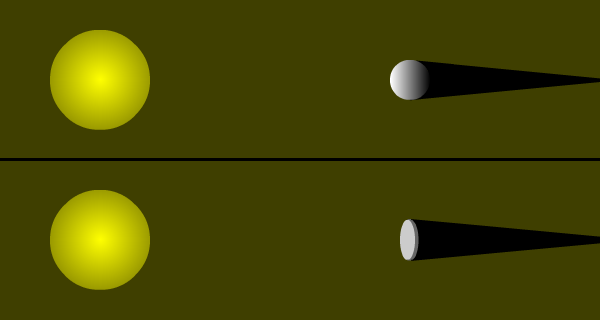

Hvis sola treffer jorda med 1366 W for hver m^2, så vil vi få den totale strålingen ved å gange strålingen per areal (s0) med det totale arealet.

$$ E_{inn} = S_0 \cdot \pi {r_{jord}}^2 $$

Der hvor s0 er den gjennomsnittlige elektromagnetiske strålingen vi fant tidligere og r_jord er radiusen til jorda.

Men siden en del av strålingen blir reflektert av systemet istedenfor absorbert (albedo), må vi gange den totale absorberte energien med en rate på 1 - strålingen som blir reflektert (albedo). Dette vil gi oss formelen:

$$ E_{absorbert} = S_0 \cdot (1 - albedo) \cdot \pi {r_{jord}}^2 $$

### Energi ut av systemet
Ved bruk av Stefan-Botzmanns lov, kan vi definere den totale emitterte strålingen som: 

$$ E_{emittert} = \sigma T^4 \cdot 4\pi {r_{jord}}^2 $$

Der 4πr^2 er overfalten til jorda som en kule som reflekterer deler av strålingen.

### Temperatur
Nå som vi både har uttrykk for E_absorbert og E_emittert, kan vi sette dem lik hverandre og finne et utrykk for gjennomsnittstemperaturen på jorda T ved bruk av generell algebra.

$$ E_{absorbert} = E_{emittert} $$

$$ S_0 \cdot (1 - albedo) \cdot \pi {r_{jord}}^2 = \sigma T^4 \cdot 4\pi {r_{jord}}^2 $$

Flytte over σ og 4πr^2

$$ T^4 = \frac{S_0 \cdot (1 - albedo) \cdot \pi {r_{jord}}^2}{\sigma \cdot 4\pi {r_{jord}}^2} $$

$$ T^4 = \frac{S_0 \cdot (1 - albedo)}{4 \sigma} $$
Fjerde kvadratrot

$$ T = \sqrt[4]{\frac{S_0 \cdot (1 - albedo)}{4 \sigma}} $$


In [11]:
albedo = 0.3

temperatur_kelvin = ((s0*(1 - albedo))/(4*sigma))**(1/4)
temperatur_celsius = temperatur_kelvin - 273.15
print ("Utregningen gir en gjenomsnittstemperatur på:",round(temperatur_celsius,2), "°C")

Utregningen gir en gjenomsnittstemperatur på: -18.34 °C


Den gjennomsnittelige temperaturen på jorda ligger egentlig rundt +15°C, men svaret vi fikk var på -18.34°C. Dette skyldes at vi anntok sola som den eneste faktoren som påvirker jordas temperatur, men i virkeligheten har vi flere naturlige og menneskeskapte prosesser som også påvirker temperaturen på jorda.

## Drivhuseffekten
Drivhuseffekten spiller en stor rolle for jordas overflatetemperatur, og er en naturlig prosess der noen gasser gjør jordas overflate varmere ved å reflektere varmestrålinger fra sola og sende dem tilbake tilbake til jorda. Drivhuseffekten er også et ganske komplekst system derfor gjør vi noen forenklinger ved å annta at 
- Atmosfæren har en konstant temperatur
- All stråling fra solen treffer jordoverflaten
- Atmosfæren tar imot all stråling fra jorden

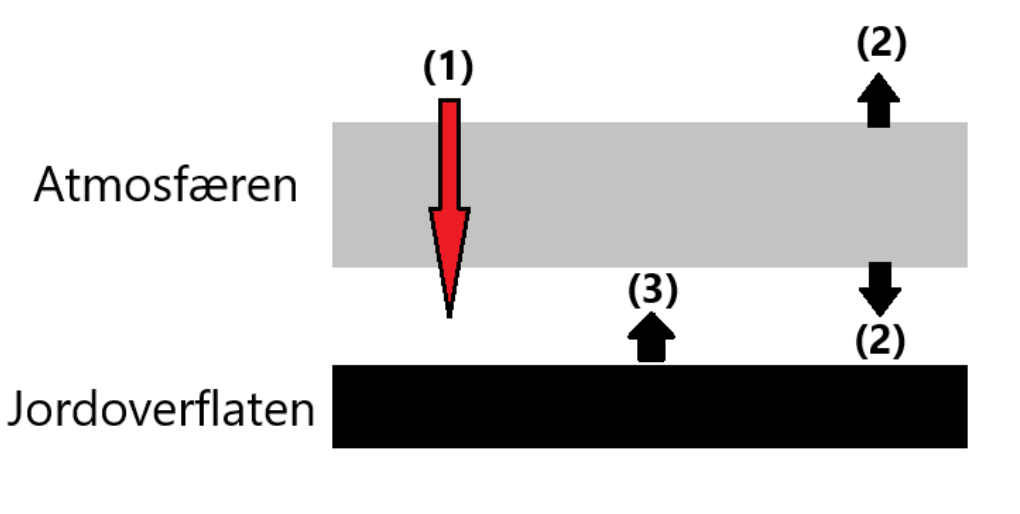

Vi deler drivhuseffekten inn i 2 system, der det ene systemet er overdelen av atmosfæren, der vi ser på energien mellom atmosfæren og verdensrommet (sola). Mens det andre systemet er mellom atmosfæren og jorda.

### Atmosfæren og verdensrommet

Strålingen som kommer gjennom atmosfæren (pil 1) er lik strålingen som blir emittert (øvre pil 2).

$$ E_{inn} = E_{ut} $$

$$ pil_1 = S_0 \cdot (1-albedo) $$

$$ pil_2 = {\sigma T_a}^4 $$

$$ pil_1 = pil_2 $$

$$ S_0 \cdot (1-albedo) = {\sigma T_a}^4 $$

Der hvor T_a er temperaturen til atmosfæren, og albedo er hvor mye av strålingen som blir reflekert av atmosfæren.


In [17]:
E_ut_Kelvin = s0 * (1-albedo)
E_ut_Celcius = E_ut_Kelvin - 273.15
print(E_ut_Celcius)

683.0644435067528


### Atmosfæren og jordoverflaten

Strålingen som treffer jordoverflaten er lik pil 1 + nedre pil 2, og ved energiloven vet vi at det er lik strålingen som blir emittert (pil 3).

$$ E_{inn} = E_{ut} $$

$$ pil_1 + pil_2 = pil_3 $$

$$ S_0 \cdot (1 - albedo) + \sigma {T_a}^4 = \sigma {T_s}^4 $$

$$ {T_s}^4 = \frac{S_0 \cdot (1 - albedo) + \sigma {T_a}^4}{\sigma} $$

$$ T_s = \sqrt[4]{\frac{S_0 \cdot (1 - albedo) + \sigma {T_a}^4}{\sigma}} $$

Der hvor T_s er teperaturen på jordoverflaten. 

In [41]:
Temperatur = ((s0*(1-albedo)+E_ut_Kelvin)/sigma)**(1/4)
Temperatur_Celcius = Temperatur - 273.15
print("Temperaturen ved jordoverflaten vil da være rudnt",round(Temperatur_Celcius,2),"°C.")

Temperaturen ved jordoverflaten vil da være rudnt 155.4 °C.


Vi kan se at denne temperaturen er mye høyere enn gjenomsnittstemperaturen på 15°C. Dette kan være på grunn av anntakelsene vi tok på starten. 

### Jordinnstråling

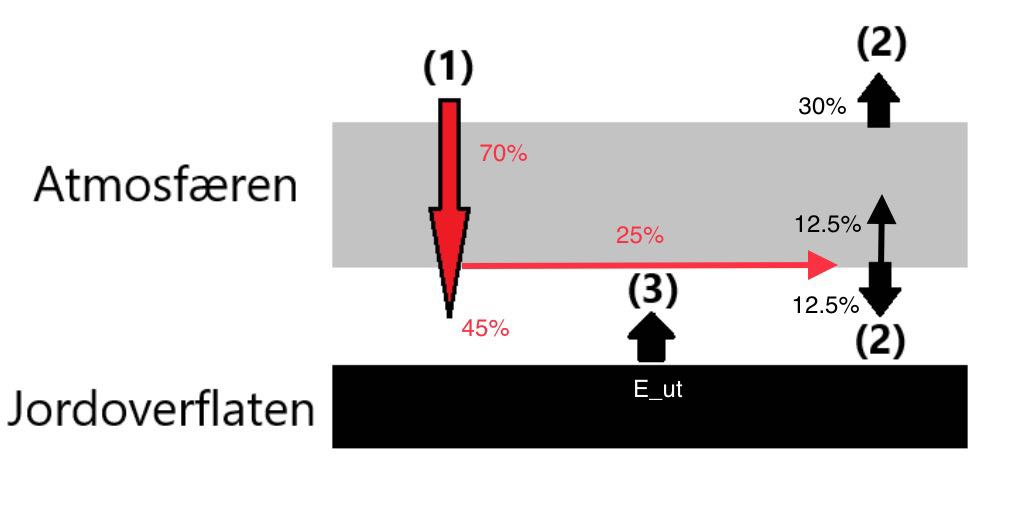

Atmosfæren absorberer heller ikke all energi som jordkloden sender ut. Omkring 25% av strålingen fra jorda blir tatt opp av drivhusgassene i atmosfæren og emittert ut i alle retninger, og halvparten av den absorberte strålingsenergien blir sendt tilbake mot jordoverflaten. Det er denne delen av strålingen som går ned mot jorden, og som kalles for atmosfærisk tilbakestråling. Det vil si at jorda absorberer 45% av all solinnstrålingen (S_0).

På grunn av Stefan Boltzmanns lov, kan E_ut skrives som:

$$ E_{ut} = \sigma {T_s}^4 $$

Vi fortsatt anta at E_inn = E_ut på grunn av energiprinsippet. Det vil si at, hvis vi ser på systemet mellom atmosfæren og jorda, kan E_ut kan også skrives som:

$$ E_{ut} = E_{inn} $$

$$ pil_3 = pil_1 + pil_2(ned) $$

$$ E_{ut} = 0.45 \cdot S_0 + 0.125 \cdot S_0 $$

Siden vi fortsatt antar at temperaturen på jorda er konstant, vil E_inn være lik E_ut, og de to utrykkene for E_ut vil være like.

$$ E_{ut} = E_{ut} $$

$$ \sigma {T_s}^4 = 0.45 \cdot S_0 + 0.125 \cdot S_0 $$

$$ {T_s}^4 = \frac{(0.45 + 0.125) S_0}{\sigma} $$

$$ T_s = \sqrt[4]{\frac{0.575 \cdot S_0}{\sigma}} $$


In [42]:
Temp_K = ((0.575*s0)/sigma)**(1/4)
Temp_C = Temp_K - 273.15
print("Den gjennomsnittlige temperaturen vil da bli ca.", round(Temp_C,2), "°C.")

Den gjennomsnittlige temperaturen vil da bli ca. 69.92 °C.


Vi kan se at vi har nermet oss den egentlige gjennomsnittstemperaturen betydelig, men er fortsatt langt over 15°C. Hadde gjennomsnittstemperaturen på jorda vært 69.92°C, hadde mesteparten av jorda vært ubeboelig.

### Varmetap
All varmestråling fra sola går ikke rett igjennom atmosfæren. I følge store norske leksikon (https://snl.no/drivhuseffekten)
Vil rundt 70 prosent av sollyset som blir fanget opp (absorbert) være med på å varme opp Jorden, men rundt 30 prosent av sollyset blir reflektert tilbake av luft, skyer og Jordens overflate, som vil tilsvare albedo, som vi fikk oppgitt tidligere.

Men strålingen fra sola vil også tape varme på vei ned til jorda. Det vil si at strålingen som treffer jorda har en lavere temperatur enn strålingen som blir sent ut av sola , og strålingen vil ha et tall for varmetap, men dessverre fant vi ikke denne konstanten, derfor regner vi baklengs for å anta en varmetapskonstant.

$$ Temperatur = varmetap (\frac{Temperatur}{lengde}) \cdot lengde $$

$$ varmetap = \frac{Temperatur}{lengde} $$

In [43]:
distanse_sol_jord = 149600000e3            #[m]
temperatur_sol = 5778                      #[Kelvin]
gjennomsnitts_temp = 15                    #[°C]
gjen_temp_K = gjennomsnitts_temp + 273.15  #[Kelvin]

delta_temp = temperatur_sol - gjen_temp_K
varme_tap = delta_temp/distanse_sol_jord

print("Vi vil da få et varmetap på",varme_tap, "Kelvin per meter.")

Vi vil da få et varmetap på 3.669685828877006e-08 Kelvin per meter.


Det vil si at hvis solas stråling mister tempeartur på rudnt 3.67 per meter fra den blir sendt ut fra sola til jorda uten andre påvirkninger, vil gjennomsnittstemperaturen på jorda bli 15°C.

## Et spesisfikt punkt på jordkloden
Tidligere har vi antatt at atmosfæren har en konstant temperatur, men det har den ikke. Atmosfæren har forskjellig temperatur avhengig av hvor på jordkloden man befinner seg. Derfor skal vi nå velge et punkt på planeten, og prøve å modellere temperaturen på dette punktet gjennom et helt år. 

Ved ekvator vil de mest solrike områdene motta en solinnstråling som tilsvarer 2 500 kWh/år per m² i følge https://eis.no/energikilder/sol/. Ved å bruke formelen vi kom fram til i forrige oppgave vil da temperaturen på dette området over et år være

$$ T_s = \sqrt[4]{\frac{0.575 \cdot 2500 }{\sigma}} $$

der 2500 er solinnstrålingen som treffer akkurat området vi har valgt



In [44]:
Temp_K = ((0.575*2500)/sigma)**(1/4)
Temp_C = Temp_K - 273.15
print("Den gjennomsnittlige temperaturen ved ekvator over et år vil da bli ca.", round(Temp_C,2), "°C.")

Den gjennomsnittlige temperaturen ved ekvator over et år vil da bli ca. 125.88 °C.


Den gjennomsnittlige temperaturen ved ekvator området er høyere enn jordas gjennomsnittlige temperatur. Siden solinnstralingen ved ekvator vil treffe på en nærmere avstand enn den flate sirkelen vi anntok jorda var tidligere. 

## Refleksjon
Vi har modellert ulike temperaturer fra solinnstrålingen på jorda med ulike antagelser. Modellene er en forenklet versjon av grunnprinsippene bak klimaforskningen, derfor ikke helt korrekte, og det er sikkert mange andre modeller vi kunne ha trukket inn for å få en næremere temperatur. Tallene vi fikk er også unøyaktige, siden verdiene alltid forandrer seg.

Oppgavene om å finne den gjennomsnittlige temperaturen på jorda gikk ganske greit, men vi fant ingen konstant for energitap for selve strålingen. Vi forstod heller ikke helt siste oppgave, men prøvde så langt det gikk.